# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV
from numpy import linalg
from sklearn import datasets
from sklearn.neighbors import kneighbors_graph
import scipy.optimize as sco
from itertools import cycle, islice
from scipy import sparse
from scipy.optimize import minimize
from scipy.spatial.distance import cdist
from sklearn.neighbors import kneighbors_graph
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\DATASETS_THESIS\diabetes\diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Data Preprocessing

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.shape

(768, 9)

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


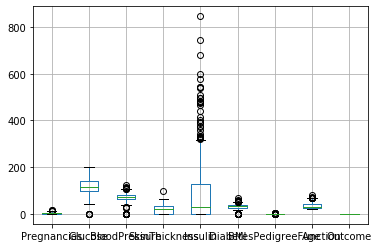

In [9]:
df.plot.box(grid='True')

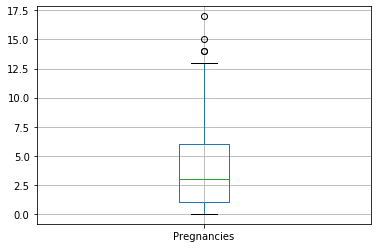

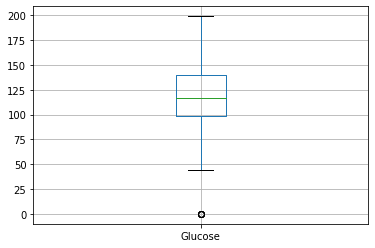

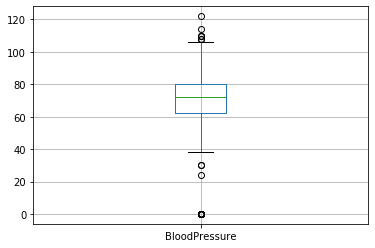

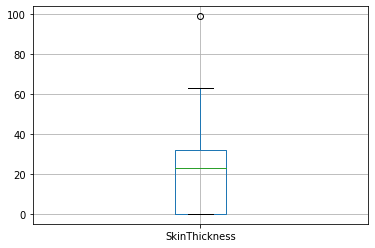

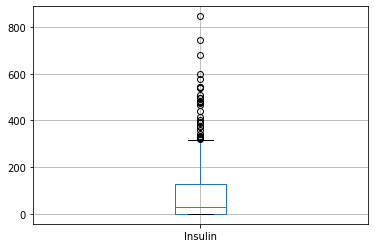

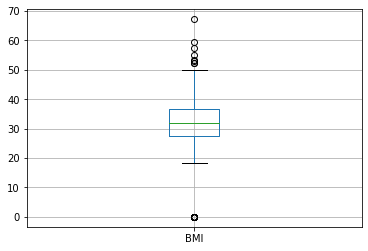

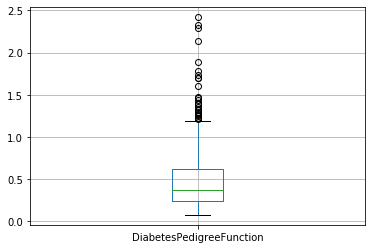

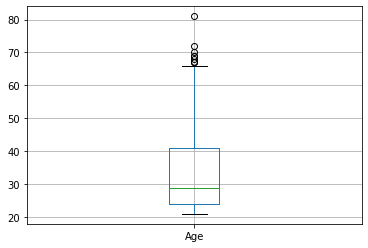

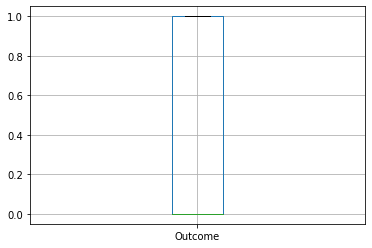

In [10]:
for i in df.columns:
    df.boxplot(column=i)
    plt.show()

In [11]:
min_thresold_Pregnancies = 0
max_thresold_Pregnancies = 15

min_thresold_Glucose = df.Glucose.quantile(0.001)
max_thresold_Glucose = df.Glucose.quantile(1)

min_thresold_DiabetesPedigreeFunction = df.DiabetesPedigreeFunction.quantile(0.001)
max_thresold_DiabetesPedigreeFunction = df.DiabetesPedigreeFunction.quantile(0.999)
print(max_thresold_Glucose)

199.0


In [13]:
df2= df[(df.DiabetesPedigreeFunction < max_thresold_DiabetesPedigreeFunction) & (df.Glucose <= max_thresold_Glucose) & (df.Pregnancies < max_thresold_Pregnancies)]


In [14]:
df2['Outcome'].value_counts()

0    500
1    265
Name: Outcome, dtype: int64

In [15]:
x=df2.drop('Outcome',axis=1)
y=df2['Outcome']

# Feature Selection using SelectKBest with chi2

In [16]:
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(x,y)

In [17]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [18]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['features','Score']

In [19]:
featureScores

,features,Score
0,Pregnancies,102.334998
1,Glucose,1384.683352
2,BloodPressure,17.106764
3,SkinThickness,42.439127
4,Insulin,2192.277567
5,BMI,120.697721
6,DiabetesPedigreeFunction,4.813745
7,Age,179.208037


In [20]:
print(featureScores.nlargest(5,'Score'))

      features        Score
4      Insulin  2192.277567
1      Glucose  1384.683352
7          Age   179.208037
5          BMI   120.697721
0  Pregnancies   102.334998


In [21]:
x=x.drop(["DiabetesPedigreeFunction","SkinThickness","BloodPressure"],axis=1)

# OverSampling the Imbalance Data Set

In [22]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [23]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(1)
X_train,y_train = os.fit_resample(X_train,y_train)

In [24]:
# print(y_train
# print(X_train.value_counts())

1    407
0    407
Name: Outcome, dtype: int64


AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [25]:
y_test.count()

153

# Prediction before Tuning HyperParameters 

In [26]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred) 
accuracies = cross_val_score(estimator = dtc, X = X_train, y = y_train, cv = StratifiedKFold(10)) 
np.average(accuracies)
metrics.accuracy_score(y_test,y_pred)

0.673202614379085

In [27]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)  
accuracies = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = StratifiedKFold(10)) 
np.average(accuracies)
metrics.accuracy_score(y_test,y_pred)

0.6928104575163399

In [28]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)  
accuracy=metrics.accuracy_score(y_test,y_pred)
print(accuracy*100)

69.93464052287581


In [29]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)  
accuracies = cross_val_score(estimator = gnb, X = X_train, y = y_train, cv = StratifiedKFold(10)) 
np.average(accuracies)
metrics.accuracy_score(y_test,y_pred)

0.673202614379085

In [30]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)  
accuracies = cross_val_score(estimator = bnb, X = X_train, y = y_train, cv = StratifiedKFold(10)) 
np.average(accuracies)
metrics.accuracy_score(y_test,y_pred)

0.5098039215686274

# Predicting by Tuning HyperParameters using GridSearchCV

In [31]:
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator =svm,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = StratifiedKFold(10),
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
 grid_search.best_score_

In [ ]:
grid_search.best_params_

In [577]:
svm = SVC(kernel='rbf',gamma=0.3)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)  
accuracy=metrics.accuracy_score(y_test,y_pred)
print(accuracy*100)

64.05228758169935


In [32]:
parameters = {
    "criterion":["gini","entropy"],
    "max_depth":[1,2,3,4,5,6,7,None]}
grid_search = GridSearchCV(estimator =dtc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = StratifiedKFold(10),
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [33]:
 grid_search.best_score_

0.8367961457392351

In [34]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': None}

In [45]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth = None)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
cm = confusion_matrix(y_test, y_pred) 
accuracy=metrics.accuracy_score(y_test,y_pred)
print(metrics.precision_score(y_test,y_pred))
print(accuracy*100)

0.639344262295082
71.89542483660131


In [46]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

In [47]:
parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
grid_search = GridSearchCV(estimator =rfc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = StratifiedKFold(10),
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [48]:
 grid_search.best_score_

0.7985245408009636

In [49]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 17}

In [59]:
rfc = RandomForestClassifier(bootstrap = True,
 max_depth = 4,
 max_features = 'auto',
 min_samples_leaf = 2,
 min_samples_split= 2,
 n_estimators = 17)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred) 
accuracy=metrics.accuracy_score(y_test,y_pred)
print(metrics.precision_score(y_test,y_pred))
print(accuracy*100)

0.6103896103896104
71.89542483660131


In [65]:
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
grid_search = GridSearchCV(estimator =gnb,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = StratifiedKFold(10),
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [66]:
 grid_search.best_score_

0.7223727792833483

In [67]:
grid_search.best_params_

{'var_smoothing': 0.0002848035868435802}

In [68]:
gnb = GaussianNB(var_smoothing=0.0002848035868435802)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)  
accuracy=metrics.accuracy_score(y_test,y_pred)
print(metrics.precision_score(y_test,y_pred))
print(accuracy*100)

0.6065573770491803
69.28104575163398


In [69]:
parameters = {"alpha":[1.0,2.0],'binarize':[0.0,1.0],"fit_prior":[True,False], 'class_prior':[0,1,2,3,4,5,6,None]}
grid_search = GridSearchCV(estimator =bnb,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = StratifiedKFold(10),
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [70]:
 grid_search.best_score_

0.5578289671785607

In [71]:
grid_search.best_params_

{'alpha': 2.0, 'binarize': 1.0, 'class_prior': None, 'fit_prior': True}

In [74]:
bnb = BernoulliNB(alpha= 2.0,
                  binarize= 1.0,
                  class_prior= None,
                  fit_prior= True)
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)  
accuracy=metrics.accuracy_score(y_test,y_pred)
print(metrics.precision_score(y_test,y_pred))
print(accuracy*100)

0.41836734693877553
50.326797385620914


In [76]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0],
      dtype=int64)

In [77]:
X_

NameError: name 'X_' is not defined

In [78]:
df3 = df3.sample(frac=1, axis=0).reset_index(drop=True)

NameError: name 'df3' is not defined

In [85]:
X_lab = df2[:385]
X_no_lab = df2[385:]
X_no_lab["Outcome"].value_counts()
X_lab["Outcome"].value_counts()

0    241
1    144
Name: Outcome, dtype: int64

In [86]:
Y=X_lab['Outcome']
X_lab = X_lab.drop(["Outcome"],axis=1)
X_no_lab = X_no_lab.drop(["Outcome"],axis=1)

In [87]:
X_ttrain,X_ttest,y_ttrain,y_ttest = train_test_split(X_lab,Y,test_size=0.2)

In [99]:
class LapSVM(object):

    def __init__(self, n_neighbors, kernel, lambda_k, lambda_u):
        """
        Laplacian Support Vector Machines
        Parameters
        ----------
        n_neighbors : integer
            Number of neighbors to use when constructing the graph
        lambda_k : float
        lambda_u : float
        """
        self.n_neighbors = n_neighbors
        self.kernel = kernel
        self.lambda_k = lambda_k
        self.lambda_u = lambda_u
    

    def fit(self, X, X_no_label, Y):
        """
        Fit the model
        
        Parameters
        ----------
        X : ndarray shape (n_labeled_samples, n_features)
            Labeled data
        X_no_label : ndarray shape (n_unlabeled_samples, n_features)
            Unlabeled data
        Y : ndarray shape (n_labeled_samples,)
            Labels
        """
        # Storing parameters
        l = X.shape[0]
        u = X_no_label.shape[0]
        n = l + u
        
        # Building main matrices
        self.X = np.concatenate([X, X_no_label], axis=0)
        Y = np.diag(Y)
        
        # Memory optimization
        del X_no_label
        
        # Building adjacency matrix from the knn graph
        print('Computing adjacent matrix', end='...')
        W = kneighbors_graph(self.X, self.n_neighbors, mode='connectivity')
        W = (((W + W.T) > 0) * 1)
        print('done')

        # Computing Graph Laplacian
        print('Computing laplacian graph', end='...')
        L = np.diag(W.sum(axis=0)) - W
        print('done')

        # Computing K with k(i,j) = kernel(i, j)
        print('Computing kernel matrix', end='...')
        K = self.kernel(self.X,self.X,1)
        print('done')

        # Creating matrix J [I (l x l), 0 (l x (l+u))]
        J = np.concatenate([np.identity(l), np.zeros(l * u).reshape(l, u)], axis=1)

        ###########################################################################
        
        # Computing "almost" alpha
        print('Inverting matrix', end='...')
        almost_alpha = np.linalg.inv(2 * self.lambda_k * np.identity(l + u) \
                                     + ((2 * self.lambda_u) / (l + u) ** 2) * L.dot(K)).dot(J.T).dot(Y)
        
        # Computing Q
        Q = Y.dot(J).dot(K).dot(almost_alpha)
        print('done')
        
        # Memory optimization
        del W, L, K, J
        
        # Solving beta using scypy optimize function
        
        print('Solving beta', end='...')
        
        e = np.ones(l)
        q = -e
        
        # ===== Objectives =====
        def objective_func(beta):
            return (1 / 2) * beta.dot(Q).dot(beta) + q.dot(beta)
        
        def objective_grad(beta):
            return np.squeeze(np.array(beta.T.dot(Q) + q))
        
        # =====Constraint(1)=====
        #   0 <= beta_i <= 1 / l
        bounds = [(0, 1 / l) for _ in range(l)]
        
        # =====Constraint(2)=====
        #  Y.dot(beta) = 0
        def constraint_func(beta):
            return beta.dot(np.diag(Y))
        
        def constraint_grad(beta):
            return np.diag(Y)
        
        cons = {'type': 'eq', 'fun': constraint_func, 'jac': constraint_grad}
        
        # ===== Solving =====
        x0 = np.zeros(l)
        
        beta_hat = sco.minimize(objective_func, x0, jac=objective_grad, \
                                constraints=cons, bounds=bounds, method='L-BFGS-B')['x']
        print('done')
        
        # Computing final alpha
        print('Computing alpha', end='...')
        self.alpha = almost_alpha.dot(beta_hat)
        print('done')
        
        del almost_alpha, Q
        
        ###########################################################################
        
        # Finding optimal decision boundary b using labeled data
        new_K = self.kernel(self.X, X,10)
        f = np.squeeze(np.array(self.alpha)).dot(new_K)
        
        def to_minimize(b):
            predictions = np.array((f > b) * 1)
            return - (sum(predictions == np.diag(Y)) / len(predictions))
        
        bs = np.linspace(0, 1, num=101)
        res = np.array([to_minimize(b) for b in bs])
        self.b = bs[res == np.min(res)][0]
    

    def predict(self, Xtest):
        """
        Parameters
        ----------
        Xtest : ndarray shape (n_samples, n_features)
            Test data
            
        Returns
        -------
        predictions : ndarray shape (n_samples, )
            Predicted labels for Xtest
        """

        # Computing K_new for X
        new_K = self.kernel(self.X, Xtest,1)
        f = np.squeeze(np.array(self.alpha)).dot(new_K)
        predictions = np.array((f > self.b) * 1)
        return predictions
    

    def accuracy(self, Xtest, Ytrue):
        """
        Parameters
        ----------
        Xtest : ndarray shape (n_samples, n_features)
            Test data
        Ytrue : ndarray shape (n_samples, )
            Test labels
        """
        predictions = self.predict(Xtest)
        accuracy = sum(predictions == Ytrue) / len(predictions)
        print('Accuracy: {}%'.format(round(accuracy * 100, 4)))

In [100]:
def rbf(X1,X2,kwargs):
    return np.exp(-cdist(X1,X2)**2*kwargs)

In [101]:
s=LapSVM(5, rbf,0.03125,10000)
s.fit(X_lab,X_no_lab,Y)

Computing adjacent matrix...done
Computing laplacian graph...done
Computing kernel matrix...done
Inverting matrix...done
Solving beta...done
Computing alpha...done


In [98]:
s.accuracy(X_lab,Y)
metrics.precision_score(X_lab,Y)

Accuracy: 64.1558%


NameError: name 'precision' is not defined

In [394]:
y_ttest

145    0
452    0
586    1
70     1
429    1
      ..
258    0
525    0
552    0
709    1
449    0
Name: Outcome, Length: 154, dtype: int64

In [442]:
X_train

,Pregnancies,Glucose,Insulin,BMI,Age
0,2,100,71,38.5,26
1,12,151,271,41.8,38
2,3,83,18,34.3,25
3,5,99,0,29.0,32
4,1,107,82,30.8,24
...,...,...,...,...,...
799,3,171,135,33.3,24
800,8,100,215,39.4,43
801,8,100,215,39.4,43
802,5,115,0,31.2,44
